In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df =  pd.read_csv('../dataset/mpi_roof_2022b.csv', usecols=[i for i in range(15)])
df

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.07.2022 00:10:00,984.33,22.42,296.91,19.72,84.70,27.17,23.01,4.16,14.67,23.38,1149.88,1.18,1.63,219.9
1,01.07.2022 00:20:00,984.36,22.02,296.50,19.72,86.80,26.51,23.01,3.50,14.67,23.38,1151.47,1.02,1.58,222.4
2,01.07.2022 00:30:00,984.35,21.77,296.25,19.68,87.90,26.11,22.95,3.16,14.63,23.32,1152.47,0.99,1.64,191.0
3,01.07.2022 00:40:00,984.27,22.00,296.49,19.47,85.60,26.48,22.67,3.81,14.45,23.03,1151.60,1.45,2.40,211.8
4,01.07.2022 00:50:00,984.36,22.23,296.71,19.40,84.00,26.86,22.56,4.30,14.38,22.92,1150.86,1.66,2.59,211.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26410,31.12.2022 23:20:00,988.09,16.83,290.98,7.37,53.59,19.20,10.29,8.91,6.50,10.41,1182.35,6.39,10.66,206.1
26411,31.12.2022 23:30:00,988.26,16.76,290.89,7.38,53.84,19.11,10.29,8.82,6.50,10.41,1182.83,5.73,9.93,207.4
26412,31.12.2022 23:40:00,988.47,16.72,290.83,7.20,53.32,19.07,10.17,8.90,6.42,10.28,1183.31,5.26,8.07,203.9
26413,31.12.2022 23:50:00,988.62,16.68,290.78,6.97,52.62,19.02,10.01,9.01,6.32,10.12,1183.72,5.55,11.47,212.0


Procesamiento Inicial del Dataset

In [52]:
# verificamos los tipos de datos en el datset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50224 entries, 0 to 50223
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   datetime         50224 non-null  object 
 1   p (mbar)         50224 non-null  float64
 2   T (degC)         50224 non-null  float64
 3   Tpot (K)         50224 non-null  float64
 4   Tdew (degC)      50224 non-null  float64
 5   rh (%)           50224 non-null  float64
 6   VPmax (mbar)     50224 non-null  float64
 7   VPact (mbar)     50224 non-null  float64
 8   VPdef (mbar)     50224 non-null  float64
 9   sh (g/kg)        50224 non-null  float64
 10  H2OC (mmol/mol)  50224 non-null  float64
 11  rho (g/m**3)     50224 non-null  float64
 12  wv (m/s)         50224 non-null  float64
 13  max. wv (m/s)    50224 non-null  float64
 14  wd (deg)         50224 non-null  float64
dtypes: float64(14), object(1)
memory usage: 5.7+ MB


In [4]:
# convertimos la columna 'Date Time' de object a datatime
df['datetime'] = pd.to_datetime(df['Date Time'], format='%d.%m.%Y %H:%M:%S')

# fijamos 'datetime' como indice, ordenamos por indice y eliminamos 'Date Time'
df.set_index('datetime', inplace=True)
df.sort_index(inplace=True)
df.drop(columns=['Date Time'], inplace=True)
df

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
datetime,,,,,,,,,,,,,,
2022-07-01 00:10:00,984.33,22.42,296.91,19.72,84.70,27.17,23.01,4.16,14.67,23.38,1149.88,1.18,1.63,219.9
2022-07-01 00:20:00,984.36,22.02,296.50,19.72,86.80,26.51,23.01,3.50,14.67,23.38,1151.47,1.02,1.58,222.4
2022-07-01 00:30:00,984.35,21.77,296.25,19.68,87.90,26.11,22.95,3.16,14.63,23.32,1152.47,0.99,1.64,191.0
2022-07-01 00:40:00,984.27,22.00,296.49,19.47,85.60,26.48,22.67,3.81,14.45,23.03,1151.60,1.45,2.40,211.8
2022-07-01 00:50:00,984.36,22.23,296.71,19.40,84.00,26.86,22.56,4.30,14.38,22.92,1150.86,1.66,2.59,211.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 23:20:00,988.09,16.83,290.98,7.37,53.59,19.20,10.29,8.91,6.50,10.41,1182.35,6.39,10.66,206.1
2022-12-31 23:30:00,988.26,16.76,290.89,7.38,53.84,19.11,10.29,8.82,6.50,10.41,1182.83,5.73,9.93,207.4
2022-12-31 23:40:00,988.47,16.72,290.83,7.20,53.32,19.07,10.17,8.90,6.42,10.28,1183.31,5.26,8.07,203.9


Analisis Exploratorio

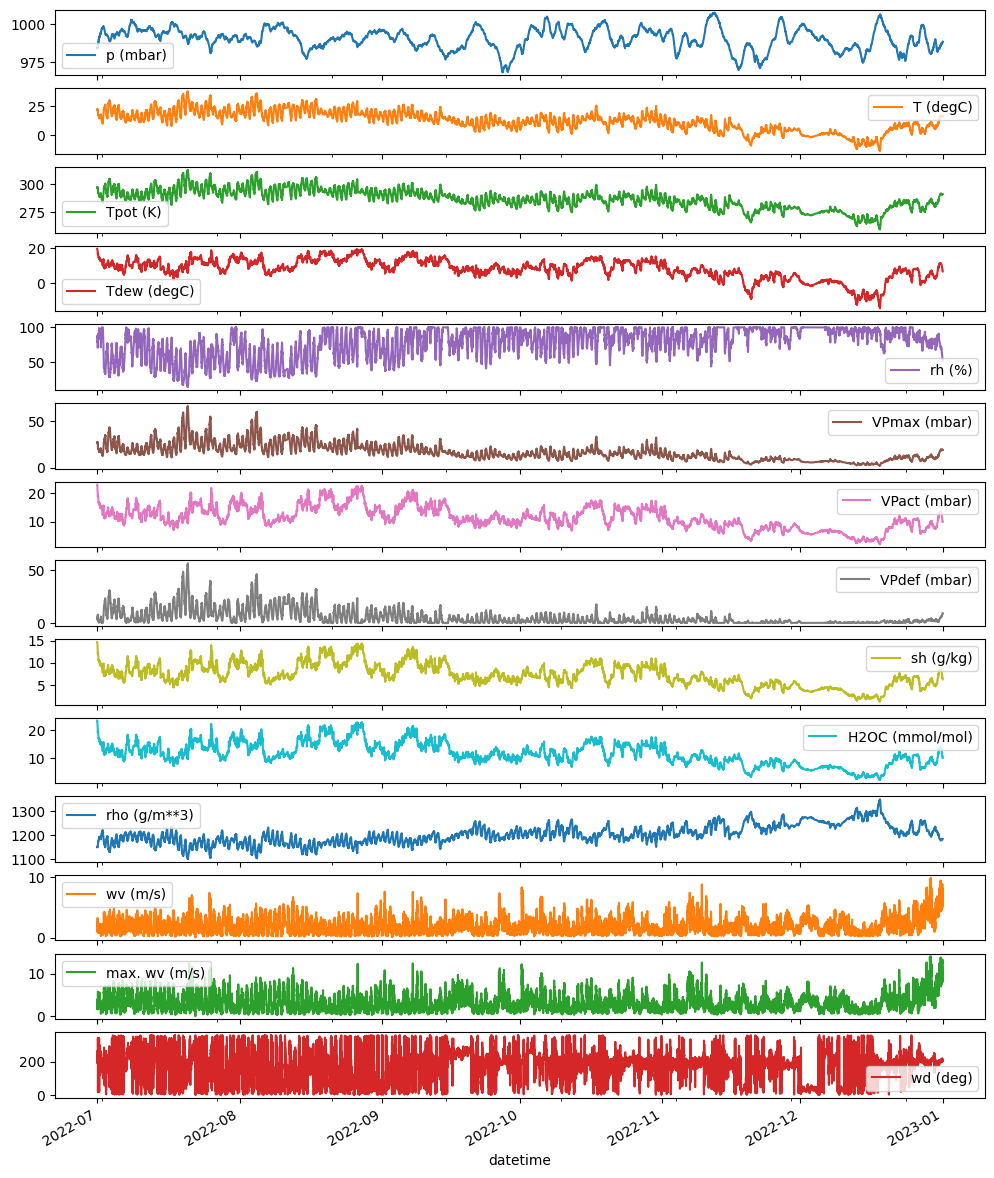

In [5]:
# Visualizamos la distribucion de los datos
cols = df.columns

N = df.shape[0]
plots = df[cols][0:N]
plots.index = df.index[0:N]
_ = plots.plot(subplots=True, figsize=(12, 16))

In [6]:
# Analisis de datos faltantes
print('Cantidad de NaNs:')
for column in df:
    nans = df[column].isna().sum()
    print(f'\tColumna {column}: {nans}')

Cantidad de NaNs:
	Columna p (mbar): 0
	Columna T (degC): 0
	Columna Tpot (K): 0
	Columna Tdew (degC): 0
	Columna rh (%): 0
	Columna VPmax (mbar): 0
	Columna VPact (mbar): 0
	Columna VPdef (mbar): 0
	Columna sh (g/kg): 0
	Columna H2OC (mmol/mol): 0
	Columna rho (g/m**3): 0
	Columna wv (m/s): 0
	Columna max. wv (m/s): 0
	Columna wd (deg): 0


In [7]:
# Analisis de periodicidad
df_time_diffs = df.index.to_series().diff().dt.total_seconds()
print(df_time_diffs.value_counts()) 

datetime
600.0      26411
0.0            1
48600.0        1
1800.0         1
Name: count, dtype: int64


Pre-procesamiento

In [8]:
# manejo de datos faltante
columns = []
for column in columns:
    df[column] = df[column].interpolate(method='linear')

# verificamos si hay nans
print('Cantidad de NaNs:')
for column in df:
    nans = df[column].isna().sum()
    print(f'\tColumna {column}: {nans}')

Cantidad de NaNs:
	Columna p (mbar): 0
	Columna T (degC): 0
	Columna Tpot (K): 0
	Columna Tdew (degC): 0
	Columna rh (%): 0
	Columna VPmax (mbar): 0
	Columna VPact (mbar): 0
	Columna VPdef (mbar): 0
	Columna sh (g/kg): 0
	Columna H2OC (mmol/mol): 0
	Columna rho (g/m**3): 0
	Columna wv (m/s): 0
	Columna max. wv (m/s): 0
	Columna wd (deg): 0


In [9]:
# ajuste de la preriodicidad
df.drop_duplicates(keep='first', inplace=True, ignore_index=False)

df_time_diffs = df.index.to_series().diff().dt.total_seconds()
print(df_time_diffs.value_counts()) 

datetime
600.0      26411
48600.0        1
1800.0         1
Name: count, dtype: int64


In [10]:
df = df.asfreq(freq='600S', fill_value='bfill')

df_time_diffs = df.index.to_series().diff().dt.total_seconds()
print(df_time_diffs.value_counts()) 

datetime
600.0    26495
Name: count, dtype: int64


In [11]:
#df.to_csv('../dataset/mpi_roof_2022b_procesado.csv')

In [12]:
df = pd.read_csv('../dataset/weather_dataset_preprocesado.csv')

Particion del dataset

In [13]:
# Función para generar las particiones preservando las características
# de la serie de tiempo

def train_val_test_split(serie, tr_size=0.8, vl_size=0.1, ts_size=0.1 ):
    # Definir número de datos en cada subserie
    N = serie.shape[0]
    Ntrain = int(tr_size*N)  # Número de datos de entrenamiento
    Nval = int(vl_size*N)    # Número de datos de validación
    Ntst = N - Ntrain - Nval # Número de datos de prueba

    # Realizar partición
    train = serie[0:Ntrain]
    val = serie[Ntrain:Ntrain+Nval]
    test = serie[Ntrain+Nval:]

    return train, val, test

# Prueba de la función
tr, vl, ts = train_val_test_split(df['T (degC)'])

print(f'Tamaño set de entrenamiento: {tr.shape}')
print(f'Tamaño set de validación: {vl.shape}')
print(f'Tamaño set de prueba: {ts.shape}')

Tamaño set de entrenamiento: (40179,)
Tamaño set de validación: (5022,)
Tamaño set de prueba: (5023,)


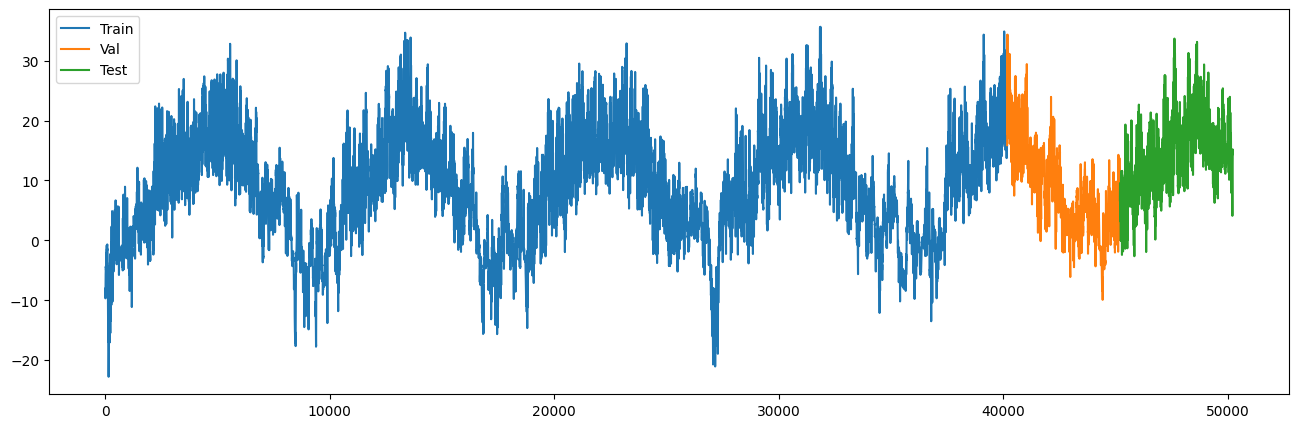

In [14]:
# Dibujemos los subsets
fig, ax = plt.subplots(figsize = (16,5))
ax.plot(tr, label='Train')
ax.plot(vl, label='Val')
ax.plot(ts, label='Test')
plt.legend()

In [15]:
def crear_dataset_supervisado(array, input_length, output_length):
    '''
    Permite crear un dataset con las entradas (X) y salidad (Y) requeridas por la red LSTM
    
    Parametros:
    - array: arreglo numpy de tamaño N x f (N: cantidad de datos, f: cantidad de features)
    - input_length: instantes de tiempo consecutivos de la(s) serie(s) de tiempo usados para alimentar el modelo
    - output_length: instantes de tiempo a pronosticar (salida del modelo)
    '''
    # Inicializacion 
    X, Y = [], [] # listado que contendra los datos de entraday salida del modelo
    shape = array.shape
    if len(shape) == 1:
        fils, cols = array.shape[0], 1
        array = array.reshape(fils, cols)
    else:
        fils, cols = array.shape

    # Generar los arreglos
    for i in range(fils - input_length - output_length):
        X.append(array[i:i+input_length, 0:cols])
        Y.append(array[i+input_length:i+input_length+output_length, -1].reshape(output_length, 1))

    # convertir listas a arreglos numpy
    X = np.array(X)
    Y = np.array(Y)

    return X, Y

In [16]:
# Crear los dataset de entrenamiento, validacion y testeo y verificar sus tamaños
INPUT_LENGTH = 24
OUTPUT_LENGTH = 1

x_tr, y_tr = crear_dataset_supervisado(tr.values, INPUT_LENGTH, OUTPUT_LENGTH)
x_vl, y_vl = crear_dataset_supervisado(vl.values, INPUT_LENGTH, OUTPUT_LENGTH)
x_ts, y_ts = crear_dataset_supervisado(ts.values, INPUT_LENGTH, OUTPUT_LENGTH)


print('Tamaños entrada (BATCHES x INPUT_LENGTH x FEATURES) y de salida (BATCHES x OUTPUT_LENGTH x FEATURES)')
print(f'Set de entrenamiento - x_tr: {x_tr.shape}, y_tr: {y_tr.shape}')
print(f'Set de validacion    - x_vl: {x_vl.shape}, y_vl: {y_vl.shape}')
print(f'Set de testeo        - x_ts: {x_ts.shape}, y_ts: {y_ts.shape}')

Tamaños entrada (BATCHES x INPUT_LENGTH x FEATURES) y de salida (BATCHES x OUTPUT_LENGTH x FEATURES)
Set de entrenamiento - x_tr: (40154, 24, 1), y_tr: (40154, 1, 1)
Set de validacion    - x_vl: (4997, 24, 1), y_vl: (4997, 1, 1)
Set de testeo        - x_ts: (4998, 24, 1), y_ts: (4998, 1, 1)


#### Escalamiento
Es requerido para garantizar que todas las características se encuentran en el mismo rango de valores, lo que facilita el entrenamiento del modelo y las predicciones:

In [24]:
from sklearn.preprocessing import MinMaxScaler

def escalar_dataset(data_input):
    '''
    Escalar el dataset en el rango -1 a 1

    Parametros:
    data_input: diccionario con los dataset de entrada y salida del modelo
    ejm: data_input = {'x_tr': x_tr, 'y_tr': y_tr, 'x_vl': x_vl, 'y_vl': y_vl, 'x_ts': x_ts, 'y_ts': y_ts}

    Retorna:
    - data_scaled: diccionario con los dataset de entrada y salida escalados
      (tiene la misma estructura del diccionario de entrada)
    -  scaler: el escalador usado (requerido para predicciones)
    '''
    NFEATS = data_input['x_tr'].shape[2]

    # Generar listado con 'scalers' (en este caso por ser solo 1 caracteristica se tendra 1 escalador)
    scaler = [MinMaxScaler(feature_range=(-1, 1)) for i in range(NFEATS)]

    # Arreglos que contendran los dataset escalados
    x_tr_s = np.zeros(data_input['x_tr'].shape)
    y_tr_s = np.zeros(data_input['y_tr'].shape)

    x_vl_s = np.zeros(data_input['x_vl'].shape)
    y_vl_s = np.zeros(data_input['y_vl'].shape)

    x_ts_s = np.zeros(data_input['x_ts'].shape)
    y_ts_s = np.zeros(data_input['y_ts'].shape)

    # Escalamiento: se usara los min/max del set de entrenamiento para escalar la totalidad de los datasets

    # Escalamiento Xs: en este caso debemos garantizar que cada dato de entrada a 'fit_transform' o 'transform'
    # debe ser de tamaño n_samples x nfeatures (en este caso 24x13)
    for i in range(NFEATS):
        x_tr_s[:, :, i] = scaler[i].fit_transform(x_tr[:, :, i])
        x_vl_s[:, :, i] = scaler[i].transform(x_vl[:, :, i])
        x_ts_s[:, :, i] = scaler[i].transform(x_ts[:, :, i])
    
    # Escalamiento de Ys
    y_tr_s[:, :, 0] = scaler[-1].fit_transform(y_tr[:, :, 0])
    y_vl_s[:, :, 0] = scaler[-1].transform(y_vl[:, :, 0])
    y_ts_s[:, :, 0] = scaler[-1].transform(y_ts[:, :, 0])

    # Construir diccionario de salida
    data_scaled = {
        'x_tr_s': x_tr_s, 'y_tr_s': y_tr_s,
        'x_vl_s': x_vl_s, 'y_vl_s': y_vl_s,
        'x_ts_s': x_ts_s, 'y_ts_s': y_ts_s
    }

    return data_scaled, scaler[0]


In [36]:
# Crear diccionario de entrada
data_in = {
    'x_tr': x_tr, 'y_tr': y_tr,
    'x_vl': x_vl, 'y_vl': y_vl,
    'x_ts': x_ts, 'y_ts': y_ts,
}

# escalar
data_s, scaler = escalar_dataset(data_in)

# extraer subsets escalados
x_tr_s, y_tr_s = data_s['x_tr_s'], data_s['y_tr_s']
x_vl_s, y_vl_s = data_s['x_vl_s'], data_s['y_vl_s']
x_ts_s, y_ts_s = data_s['x_ts_s'], data_s['y_ts_s']

# Verificacion 
print(f'Min (x_tr, x_vl, x_ts) sin escalar: ({x_tr.min()}, {x_vl.min()}, {x_ts.min()})')
print(f'Min (x_tr, x_vl, x_ts) escalado   : ({x_tr_s.min()}, {x_vl_s.min()}, {x_ts_s.min()})')

print(f'\nMin (y_tr, y_vl, y_ts) sin escalar: ({y_tr.min()}, {y_vl.min()}, {y_ts.min()})')
print(f'Min (y_tr, y_vl, y_ts) escalado   : ({y_tr_s.min()}, {y_vl_s.min()}, {y_ts_s.min()})')

print(f'\nMax (x_tr, x_vl, x_ts) sin escalar: ({x_tr.max()}, {x_vl.max()}, {x_ts.max()})')
print(f'Max (x_tr, x_vl, x_ts) escalado   : ({x_tr_s.max()}, {x_vl_s.max()}, {x_ts_s.max()})')

print(f'\nMax (y_tr, y_vl, y_ts) sin escalar: ({y_tr.max()}, {y_vl.max()}, {y_ts.max()})')
print(f'Max (y_tr, y_vl, y_ts) escalado   : ({y_tr_s.max()}, {y_vl_s.max()}, {y_ts_s.max()})')

Min (x_tr, x_vl, x_ts) sin escalar: (-22.76, -9.92, -2.64)
Min (x_tr, x_vl, x_ts) escalado   : (-1.0, -0.5603492552645094, -0.31107687039890414)

Min (y_tr, y_vl, y_ts) sin escalar: (-22.76, -9.92, -2.64)
Min (y_tr, y_vl, y_ts) escalado   : (-1.0, -0.5603492552645094, -0.31107687039890414)

Max (x_tr, x_vl, x_ts) sin escalar: (35.65, 34.34, 33.68)
Max (x_tr, x_vl, x_ts) escalado   : (1.0000000000000002, 0.9551446670090742, 0.932545796952577)

Max (y_tr, y_vl, y_ts) sin escalar: (35.65, 31.33, 33.68)
Max (y_tr, y_vl, y_ts) escalado   : (1.0000000000000002, 0.8520801232665642, 0.932545796952577)


In [41]:
# Creacion del modelo
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import RMSprop
import tensorflow as tf

# Ajustar los parametros para reproducibilidad del entrenamiento
tf.random.set_seed(123)
tf.config.experimental.enable_op_determinism()

# Modelo
N_UNITS = 128 # tamaño del estado oculto (h) y de la celda de memoria (c)
INPUT_SHAPE = (x_tr_s.shape[1], x_tr_s.shape[2]) # 24(horas) x 1(features)

modelo = Sequential()
modelo.add(LSTM(N_UNITS, input_shape=INPUT_SHAPE))
modelo.add(Dense(OUTPUT_LENGTH, activation='linear')) # activacion 'linear' ps queremos pronosticar (regresion)


# Funcion de Pérdida: se usará el RMSE (root mean squared error) para el entrenamiento
# pues permite tener errores en las mismas unidades de la temperatura
def root_mean_squared_error(y_true, y_pred):
    rmse = tf.math.sqrt(tf.math.reduce_mean(tf.square(y_pred - y_true)))
    return rmse

# compilacion
optimizador = RMSprop(learning_rate=5e-5)
modelo.compile(
    optimizer = optimizador,
    loss = root_mean_squared_error
)

In [42]:
# entrenamiento
EPOCHS = 80 
BATCH_SIZE = 256

historia = modelo.fit(
    x = x_tr_s,
    y = y_tr_s,
    batch_size = BATCH_SIZE,
    epochs = EPOCHS,
    validation_data = (x_vl_s, y_vl_s),
    verbose = 2
)

Epoch 1/80
157/157 - 12s - loss: 0.1887 - val_loss: 0.0975 - 12s/epoch - 74ms/step
Epoch 2/80
157/157 - 3s - loss: 0.1122 - val_loss: 0.0863 - 3s/epoch - 18ms/step
Epoch 3/80
157/157 - 3s - loss: 0.0963 - val_loss: 0.0739 - 3s/epoch - 19ms/step
Epoch 4/80
157/157 - 3s - loss: 0.0762 - val_loss: 0.0614 - 3s/epoch - 20ms/step
Epoch 5/80
157/157 - 3s - loss: 0.0644 - val_loss: 0.0563 - 3s/epoch - 19ms/step
Epoch 6/80
157/157 - 3s - loss: 0.0605 - val_loss: 0.0531 - 3s/epoch - 19ms/step
Epoch 7/80
157/157 - 3s - loss: 0.0572 - val_loss: 0.0516 - 3s/epoch - 19ms/step
Epoch 8/80
157/157 - 3s - loss: 0.0540 - val_loss: 0.0478 - 3s/epoch - 19ms/step
Epoch 9/80
157/157 - 3s - loss: 0.0508 - val_loss: 0.0440 - 3s/epoch - 19ms/step
Epoch 10/80
157/157 - 3s - loss: 0.0476 - val_loss: 0.0410 - 3s/epoch - 19ms/step
Epoch 11/80
157/157 - 3s - loss: 0.0449 - val_loss: 0.0406 - 3s/epoch - 18ms/step
Epoch 12/80
157/157 - 3s - loss: 0.0428 - val_loss: 0.0406 - 3s/epoch - 19ms/step
Epoch 13/80
157/157 - 3

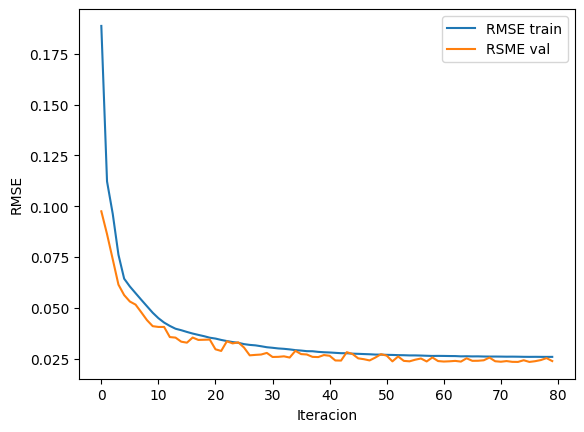

In [43]:
# Graficar curvas de entrenamiento y validacion para verificar que no existe overfitting
plt.plot(historia.history['loss'], label='RMSE train')
plt.plot(historia.history['val_loss'], label='RSME val')
plt.xlabel('Iteracion')
plt.ylabel('RMSE')
plt.legend()

In [46]:
# Calculo del RSMEs para train, val y test
rmse_tr = modelo.evaluate(x=x_tr_s, y=y_tr_s, verbose=0)
rmse_vl = modelo.evaluate(x=x_vl_s, y=y_vl_s, verbose=0)
rmse_ts = modelo.evaluate(x=x_ts_s, y=y_ts_s, verbose=0)

# Imprimir resultados en pantalla
print('Comparativo desempeños:')
print(f'  RMSE train:\t {rmse_tr:.3f}')
print(f'  RMSE val:\t {rmse_vl:.3f}')
print(f'  RMSE test:\t {rmse_ts:.3f}')

Comparativo desempeños:
  RMSE train:	 0.024
  RMSE val:	 0.023
  RMSE test:	 0.027


Prediciones del modelo

In [48]:
def predecir(x, model, scaler):
    '''
    Generar la prediccion de OUTPUT_LENGTH instantes de tiempoa futuro con el modelo entrenado

    Parametros:
    - x : batch (o batches) de datos para ingresar al model
        (tamaño: BATCHES x INPUT_LENGTH x FEATURES)
    - model : red LSTM entrenada
    - scaler : escalador (requerido para llevar la predicciona la escala original)

    Retorna:
    - y_pred: la prediccion en la escala original (tamaño:  BATCHES x OUTPUT_LENGTH x FEATURES)
    '''

    # Calcular prediccion escalada en el rango -1 a 1
    y_pred_s = model. predict(x, verbose = 0)

    # llevar la prediccion a la escala original
    y_pred = scaler.inverse_transform(y_pred_s)

    return y_pred.flatten()

In [50]:
# calcular predicciones sobre el set test
y_ts_pred = predecir(x_ts_s, modelo, scaler)
y_ts_pred

array([ 5.474853 ,  5.6782684,  5.9830246, ..., 14.607012 , 14.622002 ,
       15.32045  ], dtype=float32)

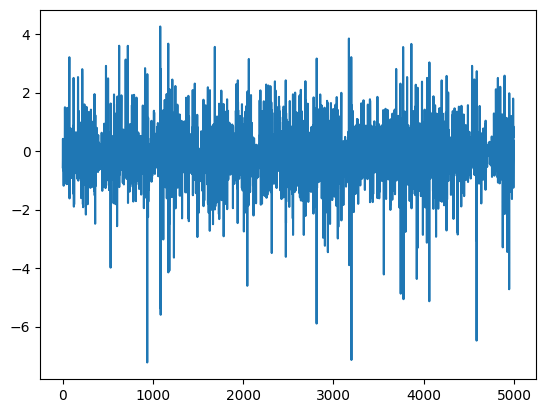

In [51]:
N = len(y_ts_pred)
ndato = np.linspace(1, N, N)

# Calculo de errores simples
errores = y_ts.flatten() - y_ts_pred
plt.plot(errores)